# Midterm Project
### by : Viral Harishkumar Jani and Pranavi Gadikoppula 
##### Data : Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County___2016-2018.csv
##### Data Source : https://catalog.data.gov/dataset/heart-disease-mortality-data-among-us-adults-35-by-state-territory-and-county-2016-2018
=> This dataset discusses mortality rate among US adults(35+) by state and county due to heart disease from 2016-2018

=> Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Data Loading

=> Load the Data

In [2]:
df = pd.read_csv('Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County___2016-2018.csv')

In [3]:
df.head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Y_lat,X_lon
0,2017,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,172.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2013,55.442393,-161.959930
1,2017,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,172.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2016,53.648343,-166.917533
2,2017,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,243.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2020,61.159145,-149.104559
3,2017,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,337.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2050,60.923648,-159.753262
4,2017,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Overall,Race/Ethnicity,Overall,T2,2060,58.753496,-156.694662


=> Check the data information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59094 entries, 0 to 59093
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        59094 non-null  int64  
 1   LocationAbbr                59094 non-null  object 
 2   LocationDesc                59094 non-null  object 
 3   GeographicLevel             59094 non-null  object 
 4   DataSource                  59094 non-null  object 
 5   Class                       59094 non-null  object 
 6   Topic                       59094 non-null  object 
 7   Data_Value                  32550 non-null  float64
 8   Data_Value_Unit             59094 non-null  object 
 9   Data_Value_Type             59094 non-null  object 
 10  Data_Value_Footnote_Symbol  26544 non-null  object 
 11  Data_Value_Footnote         26544 non-null  object 
 12  StratificationCategory1     59094 non-null  object 
 13  Stratification1             590

### Data Transformation

#### Dropping Missing Values

=> Check for missing values and their proportion

In [5]:
df.isna().sum() # total missing values in each column

Year                              0
LocationAbbr                      0
LocationDesc                      0
GeographicLevel                   0
DataSource                        0
Class                             0
Topic                             0
Data_Value                    26544
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value_Footnote_Symbol    32550
Data_Value_Footnote           32550
StratificationCategory1           0
Stratification1                   0
StratificationCategory2           0
Stratification2                   0
TopicID                           0
LocationID                        0
Y_lat                            18
X_lon                            18
dtype: int64

In [6]:
df.isna().sum() / df.shape[0] # proportion of missing values in each column

Year                          0.000000
LocationAbbr                  0.000000
LocationDesc                  0.000000
GeographicLevel               0.000000
DataSource                    0.000000
Class                         0.000000
Topic                         0.000000
Data_Value                    0.449183
Data_Value_Unit               0.000000
Data_Value_Type               0.000000
Data_Value_Footnote_Symbol    0.550817
Data_Value_Footnote           0.550817
StratificationCategory1       0.000000
Stratification1               0.000000
StratificationCategory2       0.000000
Stratification2               0.000000
TopicID                       0.000000
LocationID                    0.000000
Y_lat                         0.000305
X_lon                         0.000305
dtype: float64

=> Seems like Data_Value, Data_Value_Footnote_Symbol, Data_Value_Footnote have almost half values missing.

=> However, Data_Value is an important field and we can not drop it, so let us start with the other two columns.

In [7]:
print(df.Data_Value_Footnote_Symbol.unique())
print(df.Data_Value_Footnote.unique())

[nan '~']
[nan 'Insufficient Data']


=> Looks like both Data_Value_Footnote_Symbol and Data_Value_Footnote only have missing values, so we can drop these columns.

In [8]:
df.drop(columns= 'Data_Value_Footnote_Symbol', inplace = True)
df.drop(columns= 'Data_Value_Footnote', inplace = True)

In [9]:
df.head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Y_lat,X_lon
0,2017,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,172.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T2,2013,55.442393,-161.959930
1,2017,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,172.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T2,2016,53.648343,-166.917533
2,2017,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,243.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T2,2020,61.159145,-149.104559
3,2017,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,337.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T2,2050,60.923648,-159.753262
4,2017,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T2,2060,58.753496,-156.694662


#### Filling Missing Values

=> One thing to notice here is that the column 'Data_Value' has more than half missing values and is also the most important field in the Dataset, so we can not simply drop it or carelessly fill it with mean value. For filling in the missing values in this field, first we will check if we can group the data by LocationAbbr(States) or LocationDesc(County/States) or both, any option that is the best fit.

In [10]:
df_groupby_Locdabbr = df.groupby(by= 'LocationAbbr')
df_groupby_Locdesc = df.groupby(by= 'LocationDesc')

In [11]:
# Data grouped by LocationDesc
df_groupby_Locdesc.get_group('Aleutians East')

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Y_lat,X_lon
0,2017,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,172.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T2,2013,55.442393,-161.95993
29,2017,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Male,Race/Ethnicity,Overall,T2,2013,55.442393,-161.95993
58,2017,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Female,Race/Ethnicity,Overall,T2,2013,55.442393,-161.95993
87,2017,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,White,T2,2013,55.442393,-161.95993
116,2017,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Male,Race/Ethnicity,White,T2,2013,55.442393,-161.95993
145,2017,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Female,Race/Ethnicity,White,T2,2013,55.442393,-161.95993
174,2017,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Black,T2,2013,55.442393,-161.95993
203,2017,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Male,Race/Ethnicity,Black,T2,2013,55.442393,-161.95993
232,2017,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Female,Race/Ethnicity,Black,T2,2013,55.442393,-161.95993
261,2017,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Hispanic,T2,2013,55.442393,-161.95993


In [12]:
# Data grouped by LocationAbbr
df_groupby_Locdabbr.get_group('AK')

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Y_lat,X_lon
0,2017,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,172.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T2,2013,55.442393,-161.959930
1,2017,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,172.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T2,2016,53.648343,-166.917533
2,2017,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,243.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T2,2020,61.159145,-149.104559
3,2017,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,337.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T2,2050,60.923648,-159.753262
4,2017,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T2,2060,58.753496,-156.694662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,2017,AK,Alaska,State,NVSS,Cardiovascular Diseases,Heart Disease Mortality,190.6,"per 100,000 population","Age-adjusted, 3-year Average Rate",Gender,Male,Race/Ethnicity,Asian and Pacific Islander,T2,2,64.317300,-152.571000
536,2017,AK,Alaska,State,NVSS,Cardiovascular Diseases,Heart Disease Mortality,85.4,"per 100,000 population","Age-adjusted, 3-year Average Rate",Gender,Female,Race/Ethnicity,Asian and Pacific Islander,T2,2,64.317300,-152.571000
537,2017,AK,Alaska,State,NVSS,Cardiovascular Diseases,Heart Disease Mortality,434.7,"per 100,000 population","Age-adjusted, 3-year Average Rate",Gender,Overall,Race/Ethnicity,American Indian and Alaskan Native,T2,2,64.317300,-152.571000
538,2017,AK,Alaska,State,NVSS,Cardiovascular Diseases,Heart Disease Mortality,578.8,"per 100,000 population","Age-adjusted, 3-year Average Rate",Gender,Male,Race/Ethnicity,American Indian and Alaskan Native,T2,2,64.317300,-152.571000


In [13]:
# Before filling missing values
# Mean of Data_Value grouped by LocationDesc
df_groupby_Locdesc.Data_Value.mean()

LocationDesc
Abbeville County    312.690909
Acadia Parish       477.250000
Accomack County     484.577778
Ada County          242.661538
Adair County        431.680556
                       ...    
Yukon-Koyukuk       290.411111
Yuma County         271.229167
Zapata County       293.422222
Zavala County       390.822222
Ziebach County      336.000000
Name: Data_Value, Length: 2022, dtype: float64

In [14]:
# Before filling missing values
# Mean of Data_Value grouped by LocationAbbr
df_groupby_Locdabbr.Data_Value.mean()

LocationAbbr
AK    304.198729
AL    442.183143
AR    437.923505
AS    290.133333
AZ    275.683146
CA    291.539187
CO    244.352047
CT    245.339007
DC    299.567742
DE    267.201786
FL    279.613012
GA    379.096600
GU    623.333333
HI    279.172152
IA    333.135568
ID    283.018919
IL    336.621118
IN    345.592126
KS    331.014668
KY    426.519818
LA    435.073420
MA    227.468664
MD    295.978012
ME    292.169091
MI    358.215765
MN    262.867932
MO    387.813355
MP    324.333333
MS    469.143734
MT    337.052927
NC    304.123427
ND    327.056712
NE    301.917611
NH    246.966055
NJ    285.475749
NM    315.355048
NV    330.235686
NY    303.208088
OH    350.360722
OK    449.679094
OR    237.879688
PA    332.453590
PR    220.229958
RI    251.435484
SC    329.648571
SD    321.775375
TN    419.807783
TX    362.234539
US    294.705556
UT    278.053674
VA    328.809689
VI    211.033333
VT    302.210309
WA    266.731148
WI    304.407739
WV    386.476512
WY    299.368718
Name: Data_Value, 

In [15]:
# Reference: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group
df['Data_Value'] = df.groupby(['LocationAbbr', 'LocationDesc'])['Data_Value']\
    .transform(lambda x: x.fillna(x.mean()))

In [16]:
# After filling missing values
# Mean of Data_Value grouped by LocationDesc
df_groupby_Locdesc.Data_Value.mean()

LocationDesc
Abbeville County    312.690909
Acadia Parish       477.250000
Accomack County     484.577778
Ada County          242.661538
Adair County        422.691282
                       ...    
Yukon-Koyukuk       290.411111
Yuma County         278.352778
Zapata County       293.422222
Zavala County       390.822222
Ziebach County      336.000000
Name: Data_Value, Length: 2022, dtype: float64

In [17]:
# After filling missing values
# Mean of Data_Value grouped by LocationAbbr
df_groupby_Locdabbr.Data_Value.mean()

LocationAbbr
AK    303.578108
AL    456.659241
AR    446.617248
AS    290.133333
AZ    275.460369
CA    291.886675
CO    245.513754
CT    244.881895
DC    299.903333
DE    268.115614
FL    288.082440
GA    391.116275
GU    623.333333
HI    271.826944
IA    338.609277
ID    285.594443
IL    349.050601
IN    356.438221
KS    332.468748
KY    441.608911
LA    450.882795
MA    232.191831
MD    311.154202
ME    297.016181
MI    366.738522
MN    271.446589
MO    398.113953
MP    324.333333
MS    473.837658
MT    331.072907
NC    312.812883
ND    316.996801
NE    308.381301
NH    261.259690
NJ    285.464792
NM    318.719134
NV    328.426640
NY    306.782043
OH    363.622759
OK    456.871868
OR    246.827481
PA    342.260100
PR    220.229958
RI    251.187305
SC    338.956481
SD    317.530626
TN    433.712675
TX    368.414768
US    294.705556
UT    284.367018
VA    344.182333
VI    211.033333
VT    302.550274
WA    270.863770
WI    309.498229
WV    385.485727
WY    300.771152
Name: Data_Value, 

In [18]:
# Check the info() again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59094 entries, 0 to 59093
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     59094 non-null  int64  
 1   LocationAbbr             59094 non-null  object 
 2   LocationDesc             59094 non-null  object 
 3   GeographicLevel          59094 non-null  object 
 4   DataSource               59094 non-null  object 
 5   Class                    59094 non-null  object 
 6   Topic                    59094 non-null  object 
 7   Data_Value               58986 non-null  float64
 8   Data_Value_Unit          59094 non-null  object 
 9   Data_Value_Type          59094 non-null  object 
 10  StratificationCategory1  59094 non-null  object 
 11  Stratification1          59094 non-null  object 
 12  StratificationCategory2  59094 non-null  object 
 13  Stratification2          59094 non-null  object 
 14  TopicID               

=> Checking which data is still missing after filling it

In [19]:
df[df.Data_Value.isna()].LocationDesc.unique()

array(['Bristol Bay', 'Skagway', 'Yakutat',
       'Saint Croix (County Equivalent) County',
       'Saint John (County Equivalent) County',
       'Saint Thomas (County Equivalent) County'], dtype=object)

In [20]:
df[df.Data_Value.isna()]['LocationAbbr'].unique()

array(['AK', 'VI'], dtype=object)

=> It seems like 'Bristol Bay', 'Skagway', 'Yakutat' from 'AK' and 'Saint Croix (County Equivalent) County', 'Saint John (County Equivalent) County', 'Saint Thomas (County Equivalent) County' from 'VI' has no Data, so now we will fill its null values by 'LocationAbbr'

In [21]:
# Reference: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group
df['Data_Value'] = df.groupby(['LocationAbbr'])['Data_Value']\
    .transform(lambda x: x.fillna(x.mean()))

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59094 entries, 0 to 59093
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     59094 non-null  int64  
 1   LocationAbbr             59094 non-null  object 
 2   LocationDesc             59094 non-null  object 
 3   GeographicLevel          59094 non-null  object 
 4   DataSource               59094 non-null  object 
 5   Class                    59094 non-null  object 
 6   Topic                    59094 non-null  object 
 7   Data_Value               59094 non-null  float64
 8   Data_Value_Unit          59094 non-null  object 
 9   Data_Value_Type          59094 non-null  object 
 10  StratificationCategory1  59094 non-null  object 
 11  Stratification1          59094 non-null  object 
 12  StratificationCategory2  59094 non-null  object 
 13  Stratification2          59094 non-null  object 
 14  TopicID               

=> The few missing values in 'Y_lat' and 'X_lon' can be ignored as it is less than 0.001% of the data

#### Changing Datatype
=> Now we will optimize datatype of columns

=> We will check if there are less unique values in any column so that we can convert it's type to category

In [23]:
print(len(df['Year'].unique()))
print(len(df['LocationAbbr'].unique()))
print(len(df['LocationDesc'].unique()))
print(len(df['GeographicLevel'].unique()))
print(len(df['DataSource'].unique()))
print(len(df['Class'].unique()))
print(len(df['Topic'].unique()))
print(len(df['Data_Value_Unit'].unique()))
print(len(df['Data_Value_Type'].unique()))
print(len(df['StratificationCategory1'].unique()))
print(len(df['Stratification1'].unique()))
print(len(df['StratificationCategory2'].unique()))
print(len(df['Stratification2'].unique()))
print(len(df['TopicID'].unique()))

1
57
2022
3
1
1
1
1
2
1
3
1
6
1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59094 entries, 0 to 59093
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     59094 non-null  int64  
 1   LocationAbbr             59094 non-null  object 
 2   LocationDesc             59094 non-null  object 
 3   GeographicLevel          59094 non-null  object 
 4   DataSource               59094 non-null  object 
 5   Class                    59094 non-null  object 
 6   Topic                    59094 non-null  object 
 7   Data_Value               59094 non-null  float64
 8   Data_Value_Unit          59094 non-null  object 
 9   Data_Value_Type          59094 non-null  object 
 10  StratificationCategory1  59094 non-null  object 
 11  Stratification1          59094 non-null  object 
 12  StratificationCategory2  59094 non-null  object 
 13  Stratification2          59094 non-null  object 
 14  TopicID               

In [25]:
df['Year'] = df['Year'].astype('category')
df['LocationAbbr'] = df['LocationAbbr'].astype('category')
df['LocationDesc'] = df['LocationDesc'].astype('category')
df['GeographicLevel'] = df['GeographicLevel'].astype('category')
df['DataSource'] = df['DataSource'].astype('category')
df['Class'] = df['Class'].astype('category')
df['Topic'] = df['Topic'].astype('category')
df['Data_Value_Unit'] = df['Data_Value_Unit'].astype('category')
df['Data_Value_Type'] = df['Data_Value_Type'].astype('category')
df['StratificationCategory1'] = df['StratificationCategory1'].astype('category')
df['Stratification1'] = df['Stratification1'].astype('category')
df['StratificationCategory2'] = df['StratificationCategory2'].astype('category')
df['Stratification2'] = df['Stratification2'].astype('category')
df['TopicID'] = df['TopicID'].astype('category')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59094 entries, 0 to 59093
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Year                     59094 non-null  category
 1   LocationAbbr             59094 non-null  category
 2   LocationDesc             59094 non-null  category
 3   GeographicLevel          59094 non-null  category
 4   DataSource               59094 non-null  category
 5   Class                    59094 non-null  category
 6   Topic                    59094 non-null  category
 7   Data_Value               59094 non-null  float64 
 8   Data_Value_Unit          59094 non-null  category
 9   Data_Value_Type          59094 non-null  category
 10  StratificationCategory1  59094 non-null  category
 11  Stratification1          59094 non-null  category
 12  StratificationCategory2  59094 non-null  category
 13  Stratification2          59094 non-null  category
 14  TopicI

=> We can see that converting the datatype to category saved a lot of memory, from 8.1+ MB to 2.7 MB

### Data Visualization

=> Now we will look at some relevant visualizations regarding the Data before us and try to make some sense out of it.

In [27]:
df.head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Y_lat,X_lon
0,2017,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,172.900000,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T2,2013,55.442393,-161.959930
1,2017,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,172.200000,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T2,2016,53.648343,-166.917533
2,2017,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,243.300000,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T2,2020,61.159145,-149.104559
3,2017,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,337.100000,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T2,2050,60.923648,-159.753262
4,2017,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,303.578108,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T2,2060,58.753496,-156.694662


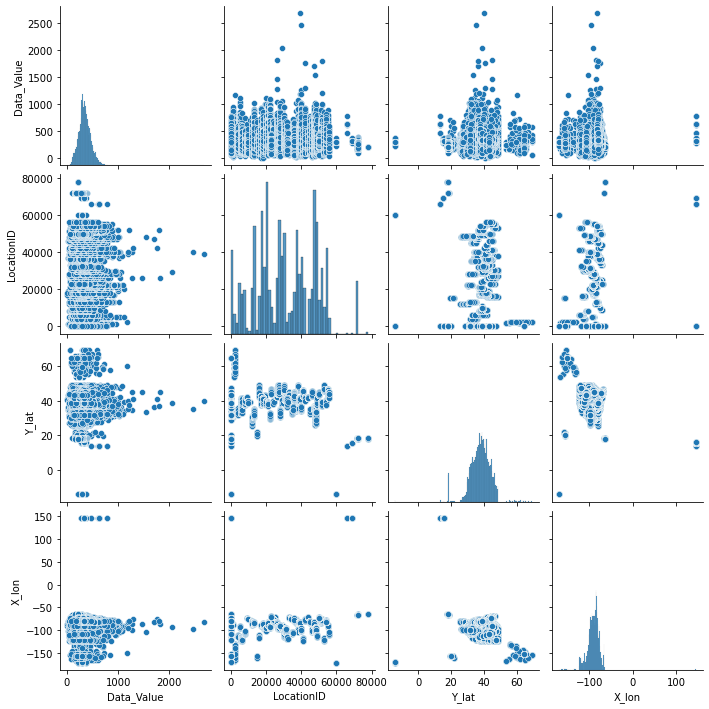

In [28]:
sns.pairplot(df) # Gives an overview of the relationship between the numeric data

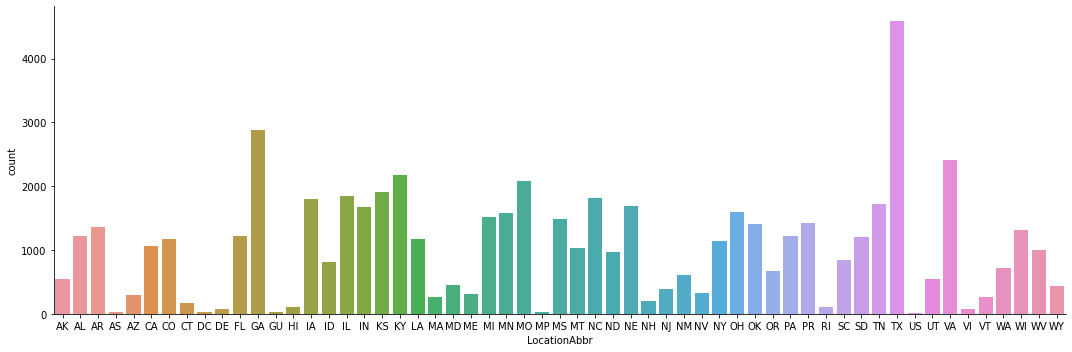

In [29]:
sns.catplot(data= df, x= 'LocationAbbr', kind = 'count', aspect= 3)

=> looking at the plot above, it is clear that most of our data comes from 'TX'(Texas)

<AxesSubplot:xlabel='Data_Value'>

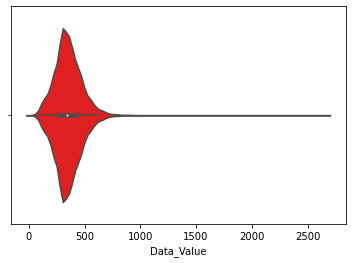

In [30]:
sns.violinplot(data= df, x= 'Data_Value', color= 'red')

<AxesSubplot:xlabel='Data_Value'>

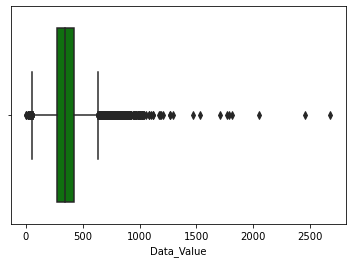

In [31]:
sns.boxplot(data= df, x= 'Data_Value', color= 'green')

=> Here, we can see the distribution of Data_Values through both boxplot and violinplot

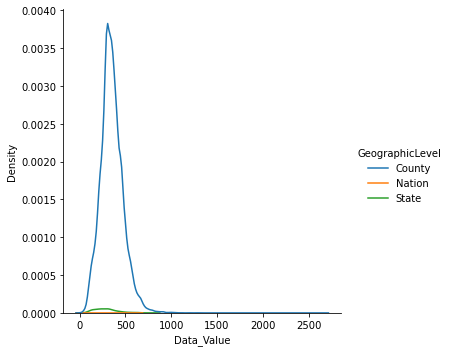

In [32]:
sns.displot(df, x= 'Data_Value', kind= 'kde', hue= 'GeographicLevel')

=> This plot depicts that majority of the data comes from county and data from state and nation is much less

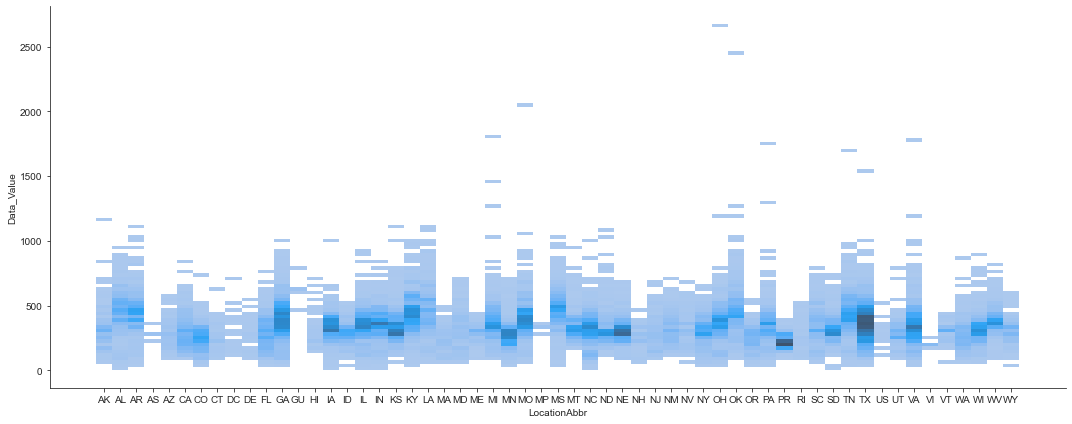

In [33]:
sns.set_style('ticks')
plot = sns.displot(data= df, x='LocationAbbr', y= 'Data_Value', aspect= 2.5, height= 6, bins= 100)

=> we can infer from the above plot that mortality rate per 100,000 in highest in 'OK' and 'OR' followed by 'MO'

In [34]:
df_groupby_Locdabbr.Data_Value.mean()

LocationAbbr
AK    303.578108
AL    456.659241
AR    446.617248
AS    290.133333
AZ    275.460369
CA    291.886675
CO    245.513754
CT    244.881895
DC    299.903333
DE    268.115614
FL    288.082440
GA    391.116275
GU    623.333333
HI    271.826944
IA    338.609277
ID    285.594443
IL    349.050601
IN    356.438221
KS    332.468748
KY    441.608911
LA    450.882795
MA    232.191831
MD    311.154202
ME    297.016181
MI    366.738522
MN    271.446589
MO    398.113953
MP    324.333333
MS    473.837658
MT    331.072907
NC    312.812883
ND    316.996801
NE    308.381301
NH    261.259690
NJ    285.464792
NM    318.719134
NV    328.426640
NY    306.782043
OH    363.622759
OK    456.871868
OR    246.827481
PA    342.260100
PR    220.229958
RI    251.187305
SC    338.956481
SD    317.530626
TN    433.712675
TX    368.414768
US    294.705556
UT    284.367018
VA    344.182333
VI    211.033333
VT    302.550274
WA    270.863770
WI    309.498229
WV    385.485727
WY    300.771152
Name: Data_Value, 

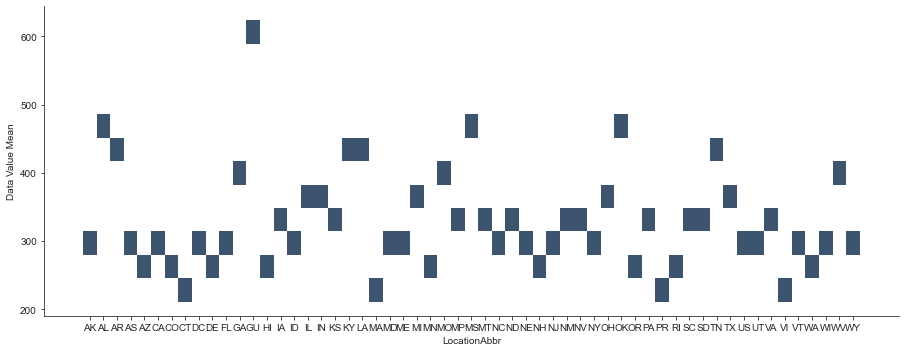

In [35]:
plot = sns.displot(data= df_groupby_Locdabbr.Data_Value.mean(), x= df_groupby_Locdabbr.Data_Value.mean().index, y= df_groupby_Locdabbr.Data_Value.mean().values, aspect= 2.5)
plot.set_ylabels('Data Value Mean')

=> It looks like 'GU' has the highest average mortality rate and 'CT', 'MN', 'PR', 'VI' has the lowest average mortality rate.

### Sanity Check

In [36]:
print(df.iloc[df['Data_Value'].argmax()]) # getting the data with Max Data_Value
print(df.iloc[df['Data_Value'].argmin()]) # getting the data with Min Data_Value

Year                                                                    2017
LocationAbbr                                                              OH
LocationDesc                                                    Noble County
GeographicLevel                                                       County
DataSource                                                              NVSS
Class                                                Cardiovascular Diseases
Topic                                                Heart Disease Mortality
Data_Value                                                            2677.0
Data_Value_Unit                                       per 100,000 population
Data_Value_Type            Age-adjusted, Spatially Smoothed, 3-year Avera...
StratificationCategory1                                               Gender
Stratification1                                                         Male
StratificationCategory2                                       Race/Ethnicity